In [17]:
import numpy as np
import tensorflow as tf

from mrtoct import data

from matplotlib import pyplot as plt

transform = data.transform.DecodeExample()

def read_volume(path):
    return (tf.data.TFRecordDataset(path, 'GZIP')
            .map(transform)
            .make_one_shot_iterator()
            .get_next())

def mae(x, y):
    return np.abs(x - y).mean()

def psnr(x, y):
    max = np.iinfo(np.uint16).max
    mse = np.square(x - y).mean()
    
    return 20 * np.log10(max / np.sqrt(mse))

In [21]:
training = {
    'inputs': read_volume('../data/tfrecord/training/mr.tfrecord'),
    'targets': read_volume('../data/tfrecord/training/ct.tfrecord'),
    'unet': read_volume('results/unet/mae2/training22080.tfrecord'),
    'pixtopix': read_volume('results/pixtopix/lsquare1e-7/training.tfrecord'),
}

validation = {
    'inputs': read_volume('../data/tfrecord/validation/mr.tfrecord'),
    'targets': read_volume('../data/tfrecord/validation/ct.tfrecord'),
    'unet': read_volume('results/unet/mae2/validation22080.tfrecord'),
    'pixtopix': read_volume('results/pixtopix/lsquare1e-7/validation.tfrecord'),
}

session = tf.Session()

In [23]:
mr_t, ct_t, unet_t, pixtopix_t = session.run(list(training.values()))
mr_v, ct_v, unet_v, pixtopix_v = session.run(list(validation.values()))

In [4]:
def unpad(x, shape):
    height = np.abs(shape[1] - x.shape[1]) / 2
    width = np.abs(shape[2] - x.shape[2]) / 2
    
    start_h = int(np.floor(height))
    start_w = int(np.floor(width))

    end_h = - int(np.ceil(height))
    end_w = - int(np.ceil(width))
    
    return x[:, start_h:end_h, start_w:end_w]

In [24]:
unet_tr = unpad(unet_t, ct_t.shape)
pixtopix_tr = unpad(pixtopix_t, ct_t.shape)

unet_vr = unpad(unet_v, ct_v.shape)
pixtopix_vr = unpad(pixtopix_v, ct_v.shape)

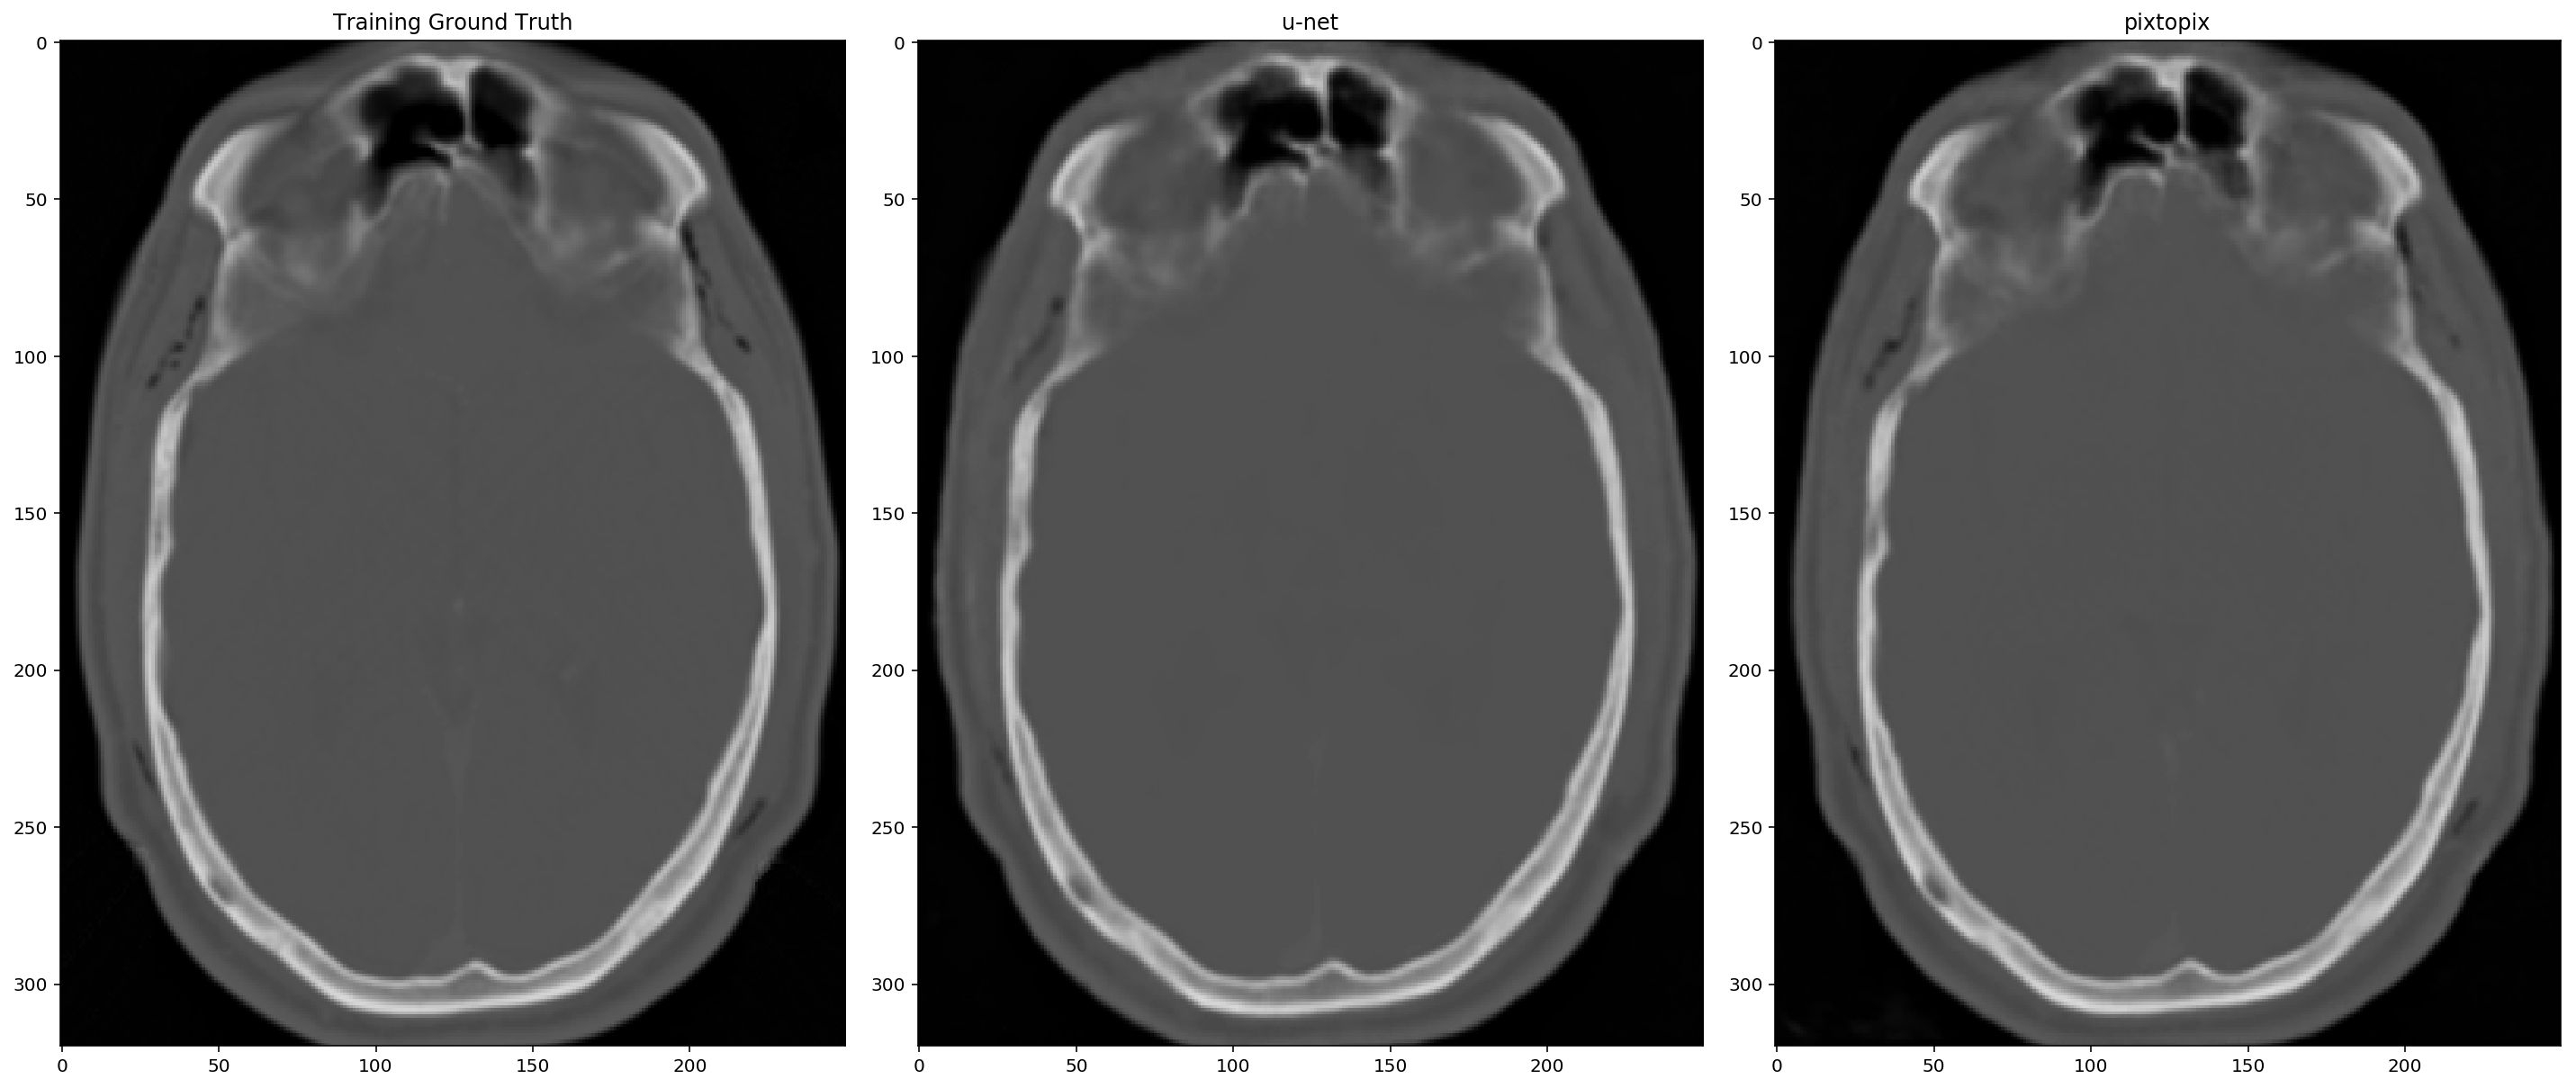

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

vmin = ct_t.min()
vmax = ct_t.max()

axes[0].set_title('Training Ground Truth')
axes[0].imshow(ct_t[100, :, :, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('u-net')
axes[1].imshow(unet_tr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_tr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

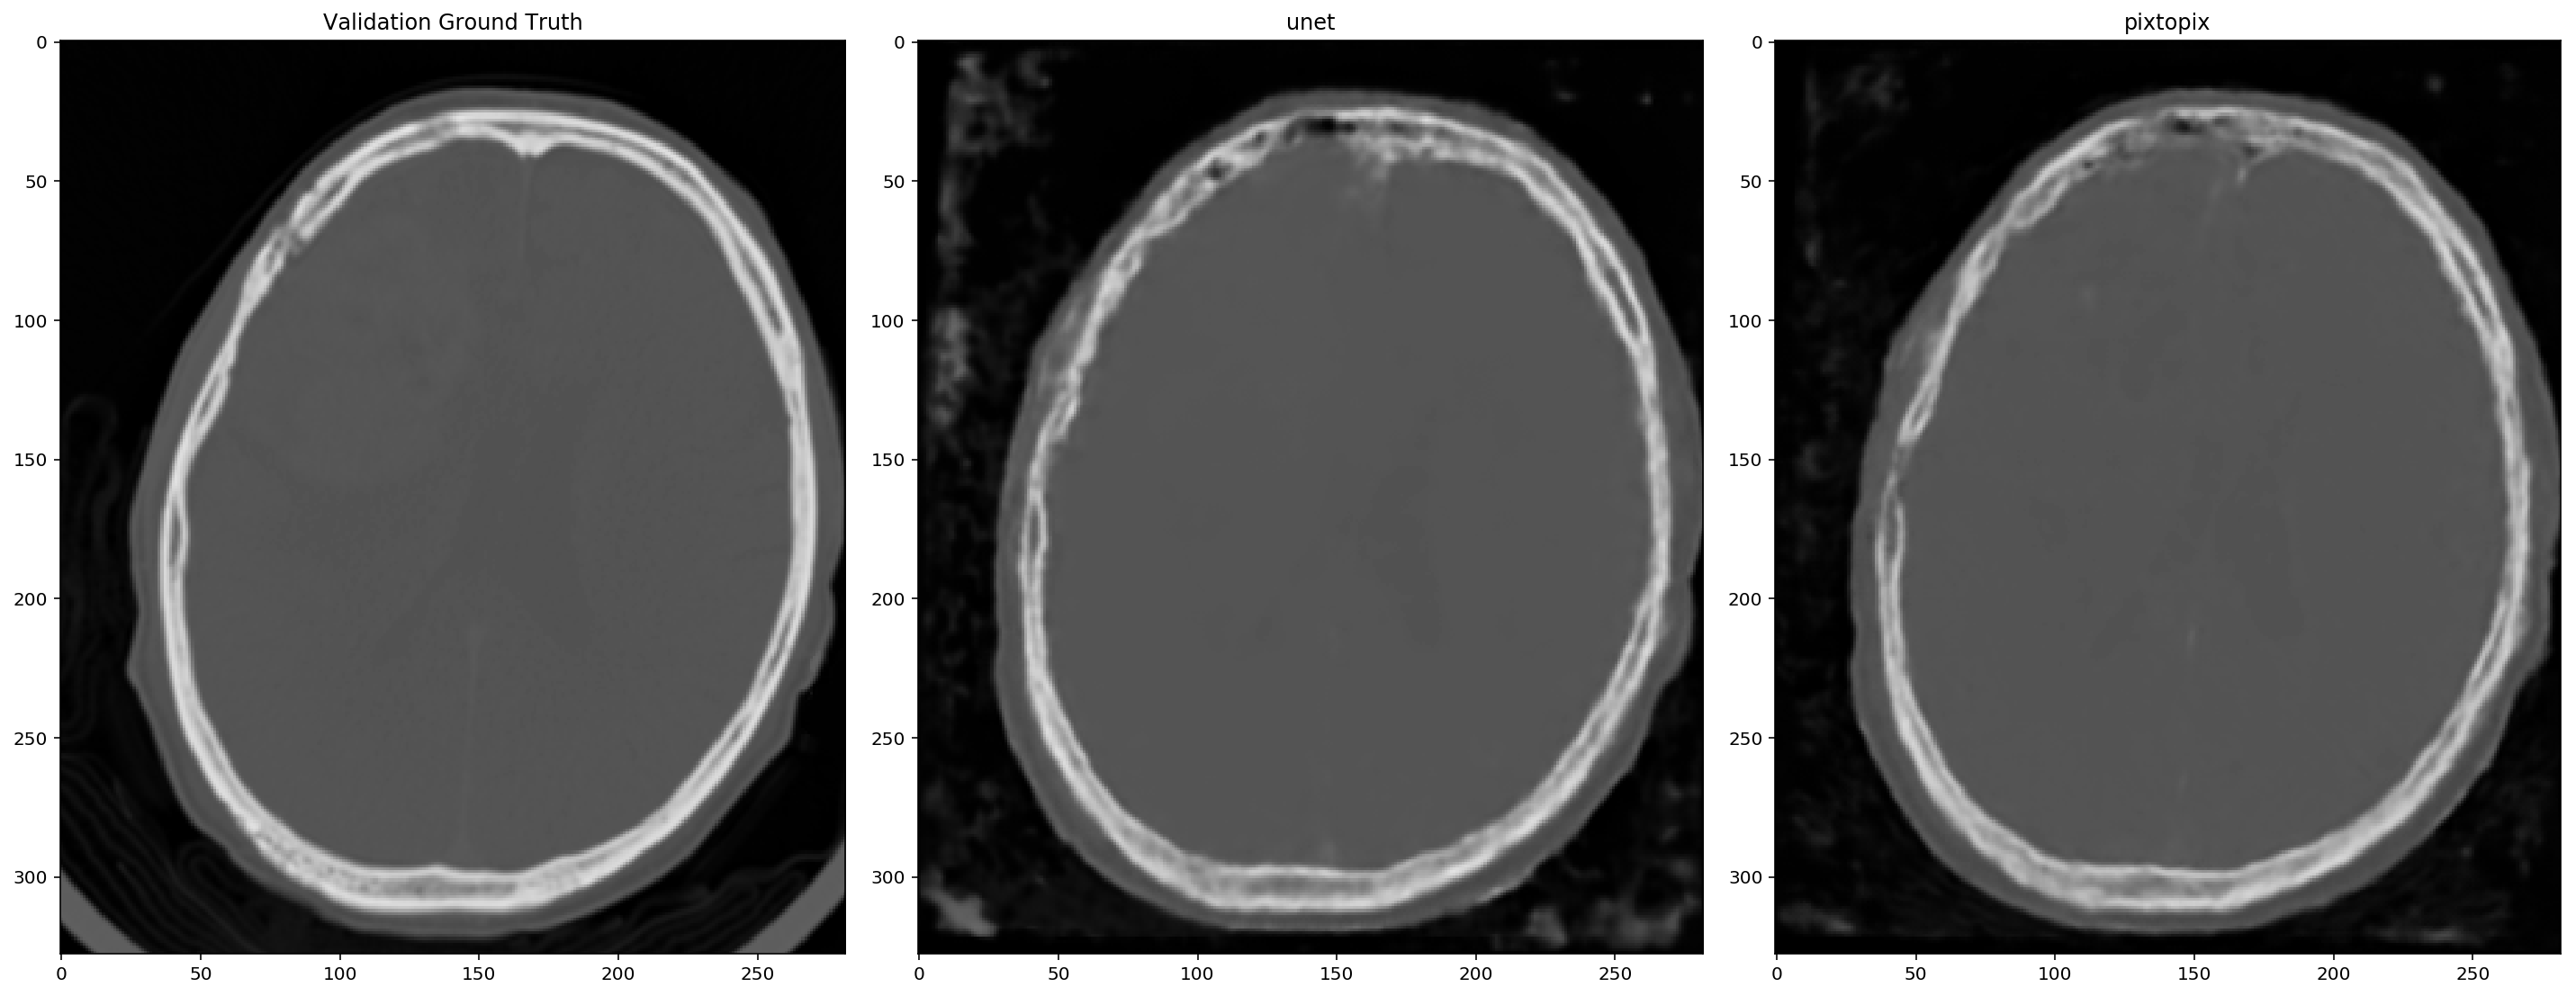

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

vmin = ct_v.min()
vmax = ct_v.max()

axes[0].set_title('Validation Ground Truth')
axes[0].imshow(ct_v[100, :, :, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('unet')
axes[1].imshow(unet_vr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_vr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

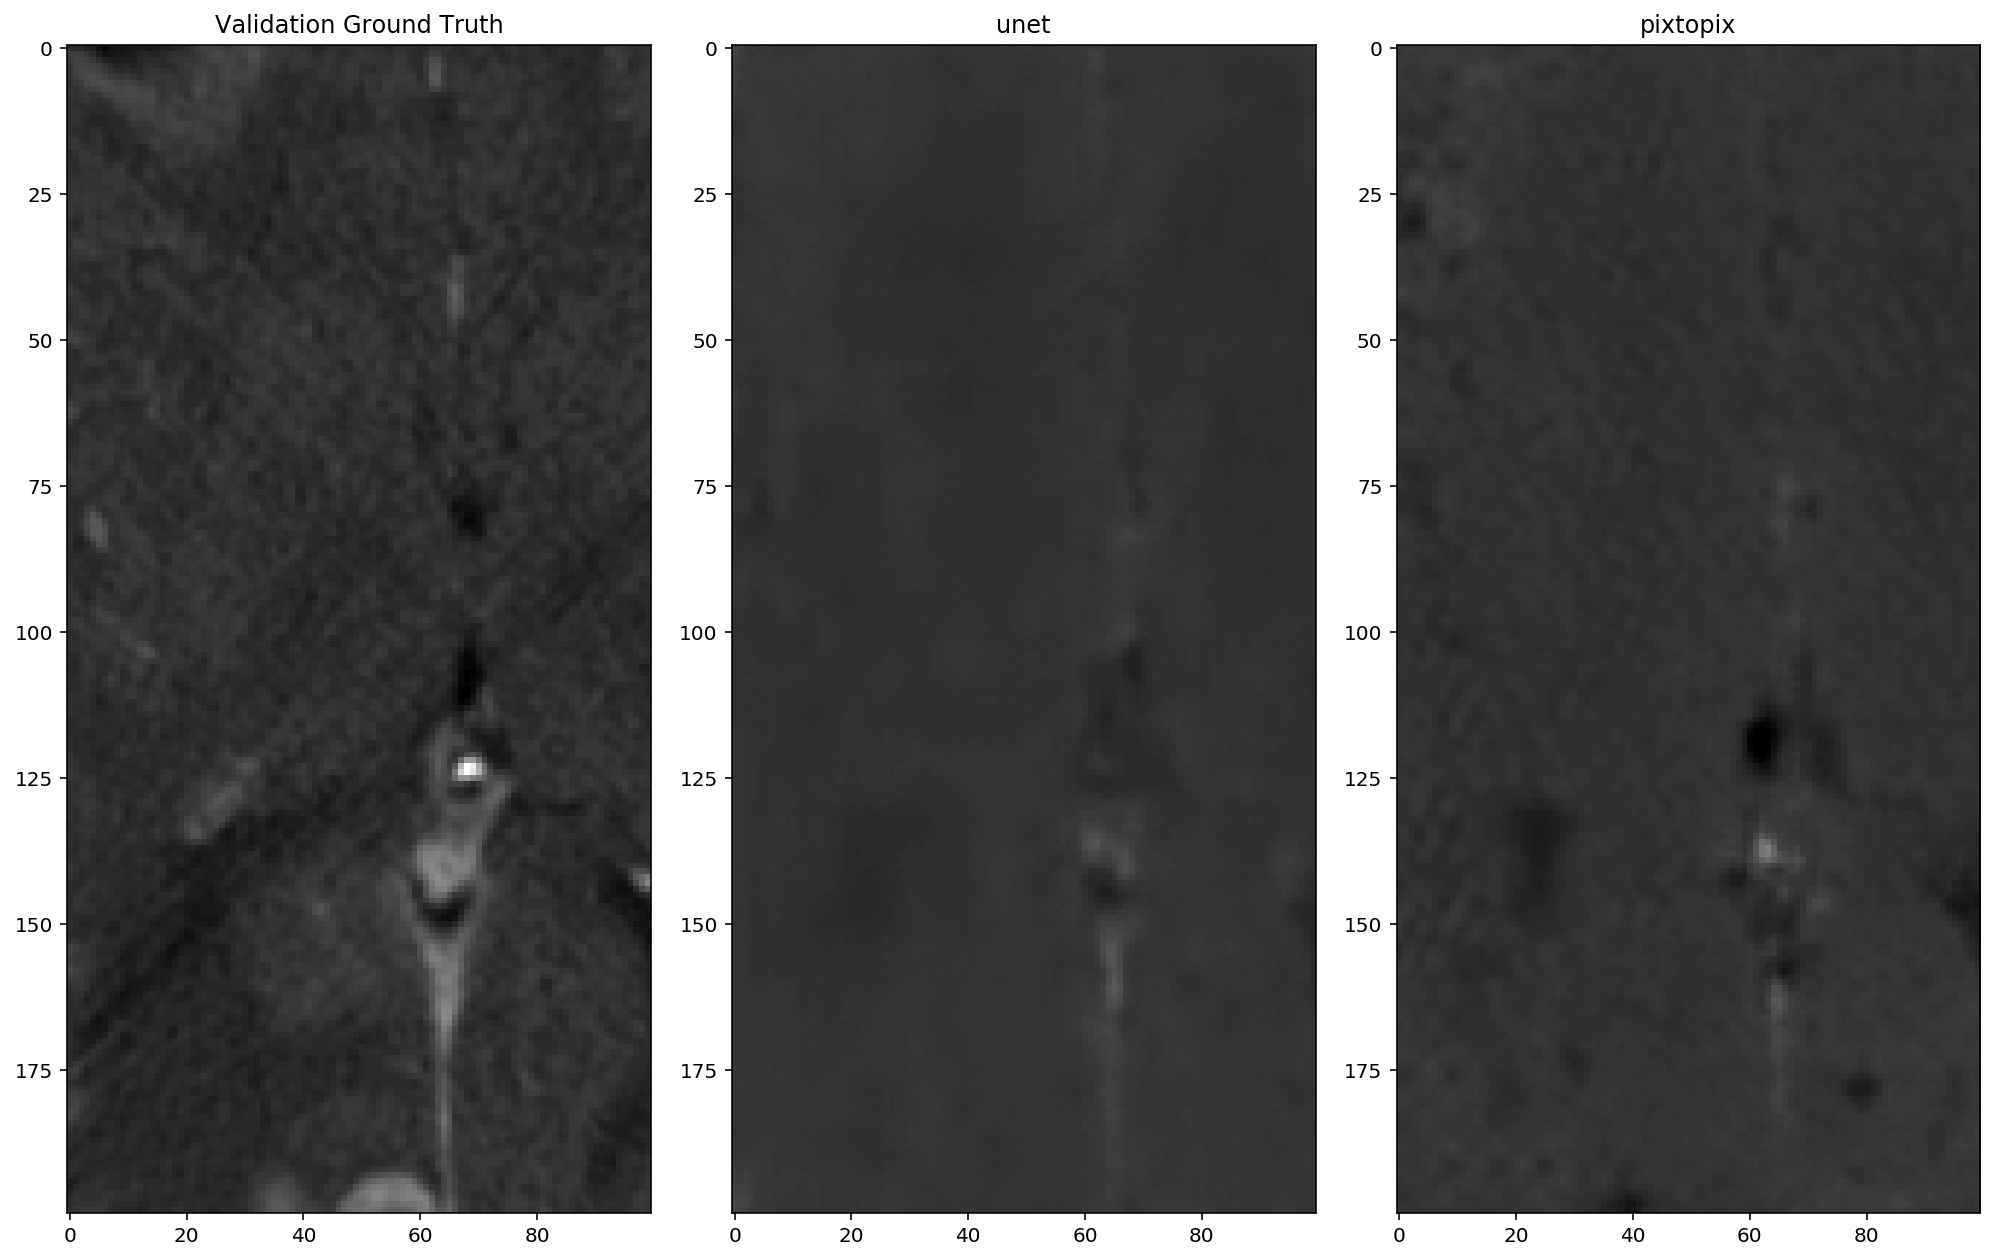

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(14, 20))

vmin = ct_v[100, 50:250, 50:150, 0].min()
vmax = ct_v[100, 50:250, 50:150, 0].max()

axes[0].set_title('Validation Ground Truth')
axes[0].imshow(ct_v[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('unet')
axes[1].imshow(unet_vr[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_vr[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

In [9]:
unet_t_mae= []
unet_t_psnr = []

pixtopix_t_mae= []
pixtopix_t_psnr = []

try:
    while True:
        mr_t, ct_t, unet_t, pixtopix_t = session.run(list(training.values()))
    
        unet_tr = unpad(unet_t, ct_t.shape)
        pixtopix_tr = unpad(pixtopix_t, ct_t.shape)
    
        unet_t_mae.append(mae(unet_tr, ct_t))
        unet_t_psnr.append(psnr(unet_tr, ct_t))
    
        pixtopix_t_mae.append(mae(pixtopix_tr, ct_t))
        pixtopix_t_psnr.append(psnr(pixtopix_tr, ct_t))
except:
    pass

In [19]:
unet_v_mae= []
unet_v_psnr = []

pixtopix_v_mae= []
pixtopix_v_psnr = []

while True:
    mr_v, ct_v, unet_v, pixtopix_v = session.run(list(validation.values()))
    
    unet_vr = unpad(unet_v, ct_v.shape)
    pixtopix_vr = unpad(pixtopix_v, ct_v.shape)
    
    unet_v_mae.append(mae(unet_vr, ct_v))
    unet_v_psnr.append(psnr(unet_vr, ct_v))
    
    pixtopix_v_mae.append(mae(pixtopix_vr, ct_v))
    pixtopix_v_psnr.append(psnr(pixtopix_vr, ct_v))

OutOfRangeError: End of sequence
	 [[Node: IteratorGetNext_29 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_29)]]

Caused by op 'IteratorGetNext_29', defined at:
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-9fa4b60df24c>", line 10, in <module>
    'targets': read_volume('../data/tfrecord/validation/ct.tfrecord'),
  File "<ipython-input-17-630f3155f537>", line 12, in read_volume
    .map(transform)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 259, in get_next
    name=name))
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 706, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): End of sequence
	 [[Node: IteratorGetNext_29 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_29)]]


In [20]:
for i, mae in enumerate(unet_v_mae):
    print(f'unet (MAE, Validation Patient {i})', mae)
print('unet (MAE, Validation Mean)', np.mean(unet_v_mae))
print('')

for i, psnr in enumerate(unet_v_psnr):
    print(f'unet (PSNR, Validation Patient {i})', psnr)
print('unet (PSNR, Validation Mean)', np.mean(unet_v_psnr))
print('')

for i, mae in enumerate(pixtopix_v_mae):
    print(f'pixtopix (MAE, Validation Patient {i})', mae)
print('pixtopix (MAE, Validation Mean)', np.mean(pixtopix_v_mae))
print('')

for i, psnr in enumerate(pixtopix_v_psnr):
    print(f'pixtopix (PSNR Validation Patient {i})', psnr)
print('pixtopix (PSNR, Validation Mean)', np.mean(pixtopix_v_psnr))

unet (MAE, Validation Patient 0) 85.0220493979
unet (MAE, Validation Patient 1) 145.778839061
unet (MAE, Validation Patient 2) 146.842477596
unet (MAE, Validation Patient 3) 147.825045756
unet (MAE, Validation Mean) 131.367102953

unet (PSNR, Validation Patient 0) 49.9857275446
unet (PSNR, Validation Patient 1) 47.0248037382
unet (PSNR, Validation Patient 2) 46.9405103375
unet (PSNR, Validation Patient 3) 47.0597985778
unet (PSNR, Validation Mean) 47.7527100495

pixtopix (MAE, Validation Patient 0) 80.6744170545
pixtopix (MAE, Validation Patient 1) 134.208751725
pixtopix (MAE, Validation Patient 2) 141.898973794
pixtopix (MAE, Validation Patient 3) 143.826703135
pixtopix (MAE, Validation Mean) 125.152211427

pixtopix (PSNR Validation Patient 0) 50.4663435409
pixtopix (PSNR Validation Patient 1) 47.2484042046
pixtopix (PSNR Validation Patient 2) 46.977997756
pixtopix (PSNR Validation Patient 3) 47.1313937365
pixtopix (PSNR, Validation Mean) 47.9560348095


In [12]:
for i, mae in enumerate(unet_t_mae):
    print(f'unet (MAE, Training Patient {i})', mae)
print('unet (MAE, Training Mean)', np.mean(unet_t_mae))
print('')

for i, psnr in enumerate(unet_t_psnr):
    print(f'unet (PSNR, Training Patient {i})', psnr)
print('unet (PSNR, Training Mean)', np.mean(unet_t_psnr))
print('')

for i, mae in enumerate(pixtopix_t_mae):
    print(f'pixtopix (MAE, Training Patient {i})', mae)
print('pixtopix (MAE, Training Mean)', np.mean(pixtopix_t_mae))
print('')

for i, psnr in enumerate(pixtopix_t_psnr):
    print(f'pixtopix (PSNR Training Patient {i})', psnr)
print('pixtopix (PSNR, Training Mean)', np.mean(pixtopix_t_psnr))

unet (MAE, Training Patient 0) 28.7069631691
unet (MAE, Training Patient 1) 22.6378451966
unet (MAE, Training Patient 2) 29.1491265982
unet (MAE, Training Patient 3) 31.2676251239
unet (MAE, Training Patient 4) 38.7735419688
unet (MAE, Training Patient 5) 42.3364022879
unet (MAE, Training Patient 6) 39.397776122
unet (MAE, Training Patient 7) 41.3826228002
unet (MAE, Training Patient 8) 35.5665753983
unet (MAE, Training Patient 9) 33.5178498258
unet (MAE, Training Patient 10) 28.1493588668
unet (MAE, Training Patient 11) 53.05841446
unet (MAE, Training Mean) 35.3286751515

unet (PSNR, Training Patient 0) 57.567474946
unet (PSNR, Training Patient 1) 62.3240358104
unet (PSNR, Training Patient 2) 58.1965171064
unet (PSNR, Training Patient 3) 59.13319311
unet (PSNR, Training Patient 4) 57.9220608826
unet (PSNR, Training Patient 5) 57.7155099501
unet (PSNR, Training Patient 6) 58.108158829
unet (PSNR, Training Patient 7) 57.2713573033
unet (PSNR, Training Patient 8) 59.3693547331
unet (PSNR